In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
df=pd.read_csv('movies data.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [298]:
#check datatypes and null values in the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [299]:
#check duplicate
df.duplicated().sum()

0

In [300]:
#describe the numerical columns
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# EDA

* 9827 rows and 9 columns
* No Duplicate nor null values
* Release_Date should be converted to datecolumn
* Generes has comma separated values and white spaces
* Overview , Orignal Language  and Poster-URL is not required

In [302]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [303]:
df['Release_Date']=df['Release_Date'].dt.year

In [304]:
df['Release_Date'].head()

0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int64

In [305]:
#removing unwanted columns
#df.columns
drop_cols=['Overview','Original_Language','Poster_Url']
df.drop(columns=drop_cols,inplace=True)

In [306]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [307]:
def categorise_colums(df,col,lables):
    limits= [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col]=pd.cut(df[col],limits,labels=labels,duplicates='drop')
    return df
             
    

In [308]:
labels=['Not Popular','Below Average','Average','Popular']
categorise_colums(df,'Vote_Average',labels)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [309]:
df['Vote_Average'].value_counts() 

Not Popular      2467
Popular          2450
Average          2412
Below Average    2398
Name: Vote_Average, dtype: int64

In [310]:
#Check for NA values
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [325]:
df['Genre']=df['Genre'].str.split(', ')


In [327]:
df=df.explode('Genre').reset_index(drop=True)

In [333]:
df['Genre']=df['Genre'].astype('category')

# Data Visualization

In [338]:
sns.set_style('whitegrid')

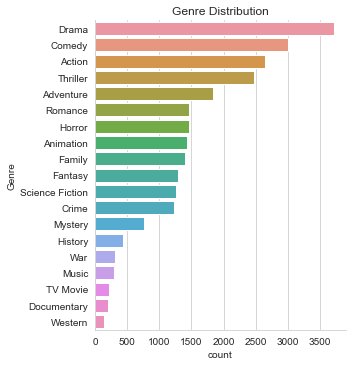

In [372]:
sns.catplot(data=df,y='Genre',kind='count',order=df['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.show()

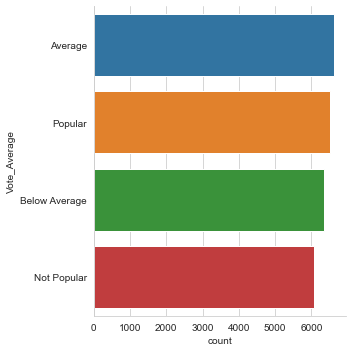

In [378]:
sns.catplot(data=df,y='Vote_Average',kind='count',order=df['Vote_Average'].value_counts().index)

In [432]:
df['Vote_Average'].value_counts()/df['Vote_Average'].size *100


Average          25.880557
Popular          25.516594
Below Average    24.843456
Not Popular      23.759393
Name: Vote_Average, dtype: float64

In [390]:
df[df['Popularity']==df['Popularity'].max()].loc[:,['Title','Genre']]

,Title,Genre
0,Spider-Man: No Way Home,Action
1,Spider-Man: No Way Home,Adventure
2,Spider-Man: No Way Home,Science Fiction


In [392]:
df[df['Popularity']==df['Popularity'].min()].loc[:,['Title','Genre']]

,Title,Genre
25546,The United States vs. Billie Holiday,Music
25547,The United States vs. Billie Holiday,Drama
25548,The United States vs. Billie Holiday,History
25549,Threads,War
25550,Threads,Drama
25551,Threads,Science Fiction


In [438]:
#Year in which maximum movies are released on the netflix
df['Release_Date'].value_counts().head(1)


2021    1636
Name: Release_Date, dtype: int64

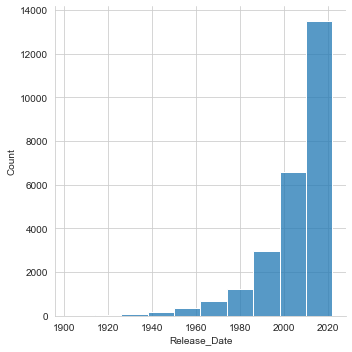

In [410]:
sns.displot(data=df,x='Release_Date',kind='hist',bins=10)

<AxesSubplot:>

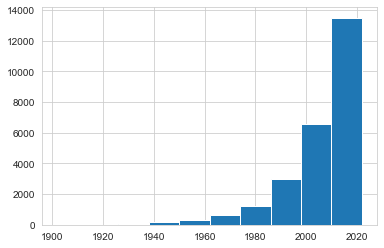

In [402]:
df['Release_Date'].hist()

# Conclusions

* What is the most frequent genre in the dataset?
** Drama is the most frequent genre.

* What geners has highest votes?
-  25.88 % Votes are for Average rating.

* Which movie got the highest popularity and what is it genre?
- Spider-Man: No Way Home got the highest popularity and its genre is Action, Adventure and Science Fiction

* Which movie got the lowest popularity and what is it genre?
- The United States vs. Billie Holiday its genre is Music, History, Drama and Threads its genre is Drama, War, Science Fiction has least popularity.

* Which year has most filmed movies?
 -  2021 has most filmed movies around 1636.